In [1]:
import pandas as pd
import re
import os
import numpy as np
import glob
from datetime import datetime
import geopandas as gpd
import json
from shapely.geometry import shape, GeometryCollection
from rasterio.plot import show
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

import shutil
import rasterio
%matplotlib inline

In [2]:
# 가능한 font list 확인
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
# print(f)

plt.rc('font', family='Malgun Gothic')

In [43]:
# img_folder = r'D:\2023_0823_청도그레이스_맑고뭉게구름_데이터 1차 분류본'
img_folder = r'D:\2023_0825_레드엣지피-클럽디속리산'

In [44]:
files = glob.glob(os.path.join(img_folder,'**/*_1.TIF'), recursive=True)

len(files)

1046

In [45]:
# files

In [46]:
target_files = [ x for x in files if ('_1.tif'in x) ]

len(target_files)

1046

In [115]:
file_ = target_files[721]
file_

'D:\\2023_0825_레드엣지피-클럽디속리산\\B\\0000SET\\001\\IMG_0375_1.tif'

In [116]:
'_'.join(os.path.split(file_)[1].split('_')[0:2])

'IMG_0375'

In [117]:
fileList = glob.glob(os.path.join(os.path.split(file_)[0],'_'.join(os.path.split(file_)[1].split('_')[0:2]) + '*'), recursive=True)
fileList

['D:\\2023_0825_레드엣지피-클럽디속리산\\B\\0000SET\\001\\IMG_0375_1.tif',
 'D:\\2023_0825_레드엣지피-클럽디속리산\\B\\0000SET\\001\\IMG_0375_2.tif',
 'D:\\2023_0825_레드엣지피-클럽디속리산\\B\\0000SET\\001\\IMG_0375_3.tif',
 'D:\\2023_0825_레드엣지피-클럽디속리산\\B\\0000SET\\001\\IMG_0375_4.tif',
 'D:\\2023_0825_레드엣지피-클럽디속리산\\B\\0000SET\\001\\IMG_0375_5.tif',
 'D:\\2023_0825_레드엣지피-클럽디속리산\\B\\0000SET\\001\\IMG_0375_6.tif']

In [118]:
import rasterio
import numpy as np
from rasterio import plot
from rasterio.plot import show
from skimage import exposure

BBand =rasterio.open(fileList[0]).read(1).astype(float)/65536.
GBand =rasterio.open(fileList[1]).read(1).astype(float)/65536.
RBand =rasterio.open(fileList[2]).read(1).astype(float)/65536.
REBand  =rasterio.open(fileList[3]).read(1).astype(float)/65536.
NIRBand =rasterio.open(fileList[4]).read(1).astype(float)/65536.
Panchromatic =rasterio.open(fileList[5]).read(1).astype(float)/65536.

image_Nat  = np.array([(3*GBand - NIRBand)/4, (3*GBand + NIRBand)/4, RBand])
image_Nat = np.moveaxis(image_Nat, 0, 2)

# p2, p98 = np.percentile(image_Nat, (2,98))
# image_Nat = exposure.rescale_intensity(image_Nat, in_range=(p2, p98))
# image_Nat = np.moveaxis(image_Nat, 0, 2)

image_true = np.array([BBand, GBand, RBand])
image_true = np.moveaxis(image_true, 0, 2)

# show(image.transpose(2,0,1), transform=img.transform)

In [119]:
Panchromatic.max()

0.99951171875

In [123]:
BBand.shape

(1088, 1456)

In [120]:
import numpy as np
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (NIRBand.astype(float) - RBand.astype(float)) / (NIRBand.astype(float) + RBand.astype(float))

In [121]:
BBand.max()

0.99951171875

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Image from RGB')

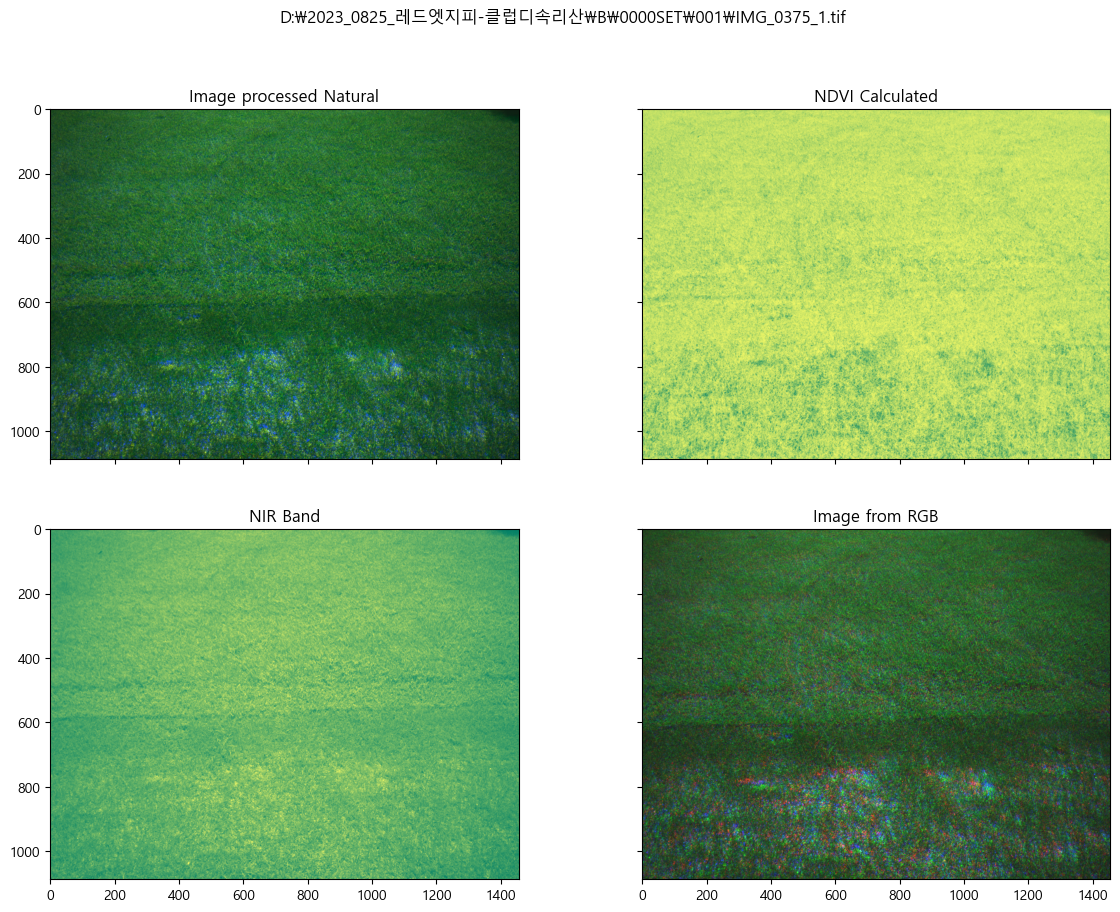

In [122]:
fig, axs = plt.subplots(2,2 , figsize=(14, 10),sharex='col', sharey='row')
fig.suptitle(file_)

axs[0, 0].imshow(image_Nat)
axs[0, 0].set_title("Image processed Natural")
axs[0, 1].imshow(ndvi, cmap=plt.cm.summer)
axs[0, 1].set_title("NDVI Calculated")

axs[1, 0].imshow(NIRBand, cmap=plt.cm.summer)
axs[1, 0].set_title("NIR Band")
axs[1, 1].imshow(image_true)
axs[1, 1].set_title("Image from RGB")
